# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

# Методы определения выбросов

- Метод сигм — то же самое, что и метод z-отклонений — один из методов определения выбросов, который вы изучали в модуле «PYTHON-14. Очистка данных. Юнит 6. Методы выявления выбросов».
- Метод межквартального размаха, он же метод Тьюки, — ещё один метод, который вы применяли в модуле «PYTHON-14. Очистка данных. Юнит 6. Методы выявления выбросов».
- Метод межквартального размаха, он же метод Тьюки, — ещё один метод, который вы применяли в модуле «PYTHON-14. Очистка данных. Юнит 6. Методы выявления выбросов».
- Метод сигм — то же самое, что и метод z-отклонений — один из методов определения выбросов, который вы изучали в модуле «PYTHON-14. Очистка данных. Юнит 6. Методы выявления выбросов».
***
__EDA (Exploratory Data Analysis)__ — разведывательный анализ данных. Этот этап дата-сайентисты проводят перед построением самой модели. Цель этого этапа — понять, что нам могут дать данные, и как признаки могут быть взаимосвязаны между собой. Понимание изначальных признаков позволит создать новые, более сильные признаки и повысить качество модели. 

Качественная модель способна выдавать правильные результаты на любых новых данных, которые никогда не участвовали в обучении.   

Изучив разведывательный анализ данных, мы будем готовы создать первую модель! EDA помогает искать смысл и закономерности в данных, но для этого нам необходимы все навыки, освоенные в модулях раньше! 

*EDA — это совокупность разнообразных навыков и умений, инструментов для работы с данными.*

В ЭТОМ МОДУЛЕ ВЫ УЗНАЕТЕ:

- какую роль играет анализ данных в машинном обучении;
- какие библиотеки Python помогут вам в освоении разведывательного анализа данных;
- поработаете с данными и узнаете, какие типы признаков существуют;
- проверите знания из прошлых модулей и примените их на практике;
- узнаете, как можно сделать разведывательный анализ данных одной строчкой кода.

ЦЕЛИ МОДУЛЯ:

- Узнать, какую роль EDA играет в машинном обучении.
- Узнать, какие навыки необходимы в освоении EDA.
- Узнать, какие типы признаков существуют, и уметь их различать.
- Поработать с библиотеками и инструментами, которые облегчат EDA.
***

- Процесс EDA необходим для получения более качественной модели.
- EDA — это последний этап перед построением модели.
- Дата-сайентисты занимаются разведывательным анализом данных.


# 2. Жизненный цикл ML-модели и роль EDA в машинном обучении

Тот, кто занимается машинным обучением, обычно проходит следующие этапы: формулировка бизнес-проблемы, сбор данных и их очистка, разведывательный анализ данных, разработка и построение модели, внедрение модели в продакшен.

Всё это называется жизненным циклом модели машинного обучения.

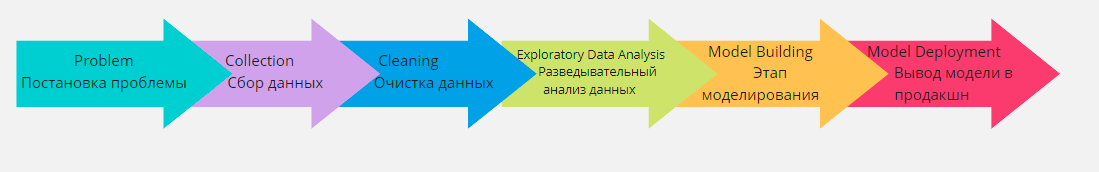

Мы можем выделить несколько этапов жизненного цикла модели машинного обучения.

0. ПОСТАНОВКА ПРОБЛЕМЫ

Жизненный цикл нашей модели начинается с определения проблемы для бизнеса. Мы будем рассматривать все этапы цикла на одном примере.

<hr style="border-style: dashed;">
Микрокредитная организация решила автоматизировать процесс выдачи кредитов и обратилась за помощью к специалистам по машинному обучению. Вместе с аналитиками компания выяснила, что им необходима прогностическая модель, которая определяла бы по данным клиента вероятность его дефолта.
<hr style="border-style: dashed;">

>Дефолт — невыполнение обязательств договора займа, например неоплата процентов или основного долга в установленный период.

***

1. СБОР ДАННЫХ

Модель машинного обучения напрямую зависит от количества и качества передаваемых в неё данных. Чтобы получить в итоговой модели более качественные данные, на этапе сбора нам необходимо собрать максимальное их количество.

<hr style="border-style: dashed;">
Дата-аналитики микрокредитной организации запросили у сотового оператора информацию о перемещениях клиента. Так компания сможет проверить, верно ли клиент указал место проживания и работы или предоставил ложную информацию, что, по мнению аналитиков, может стать полезным признаком.
<hr style="border-style: dashed;">

***

2. ОЧИСТКА ДАННЫХ

После сбора данных мы должны избавиться от «мусора» (некачественных данных), и именно от этого этапа будет зависеть качество финальной модели машинного обучения. 

>Garbage in — garbage out (GIGO), в пер. с англ. «мусор на входе — мусор на выходе».

На этапе очистки данных мы определяем пропущенные значения, аномалии и выбросы в данных. 

Данные с пропусками в большинстве случаев нельзя передать в модель.

<hr style="border-style: dashed;">
В случае с микрокредитной организацией на ранних этапах работы компании в анкете клиента не заполнялся регион проживания. Аналитики пытаются по адресу заполнить значения, а там, где это невозможно, просто проставляют значение ‘unknown’, как делали это вы в модуле PYTHON-14. Очистка данных.

Дублирующиеся данные и выбросы, аномальные значения не приносят пользу алгоритму. 

Слишком высокие значения зарплат чаще всего являются ложной информацией среди заемщиков и могут сбивать алгоритмы с толку, поэтому для таких признаков проводят обработку выбросов. Эти действия вы выполняли в модуле PYTHON-14. Очистка данных, тем самым подготавливая почву для последующего анализа данных.
<hr style="border-style: dashed;">

***

3. РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ 

Данные ценны не сами по себе, а только если приносят пользу. Разведывательный анализ данных похож на работу детектива: имея под рукой данные, вы ищете подсказки и идеи для извлечения из них полезной информации для бизнес-задачи, которую вы пытаетесь решить. Вы исследуете одну переменную, затем две переменные вместе, а затем сразу несколько переменных. Если ваша модель показывает неудовлетворительные результаты, то почти всегда виновником является набор обучающих данных, содержащий ошибки. Они и создают потолок качества для вашей модели.

<hr style="border-style: dashed;">
Дата-сайентисты обнаружили, что очень важным параметром является балл из кредитной истории заёмщика. Он действительно содержит в себе очень много информации о поведении заёмщика в предыдущих кредитах. Такая информация будет скорее всего полезна модели. Специалисты по данным приняли решение раскрыть этот важный признак на несколько составляющих, поскольку полагают, что новые, более сильные признаки сделают модель лучше.
<hr style="border-style: dashed;">

***

4. ЭТАП МОДЕЛИРОВАНИЯ И ВЫВОДА МОДЕЛИ В ПРОДАКШЕН 

На этом этапе ведётся построение предсказательных моделей, проверка качества и публикация модели. Эти этапы вы будете подробно изучать далее в курсе в блоках по машинному обучению. 
***
❗️ Важно! На самом деле цикл машинного обучения редко имеет линейную структуру. Он представляют собой повторяющийся цикл улучшения данных и модели. В любой момент мы можем вернуться на этап разведывательного анализа данных или даже на этап формулирования бизнес-проблемы, если качество модели неудовлетворительное.
***

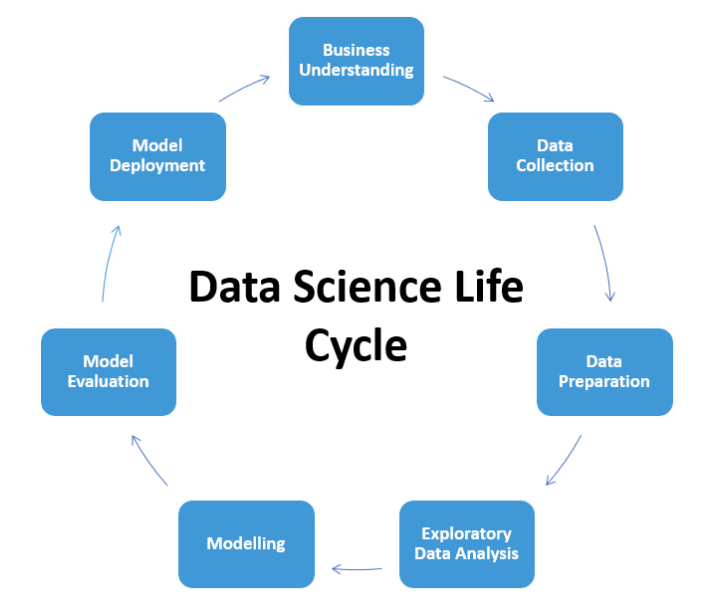

***

В реальной жизни не всегда полный цикл проводится одним человеком. На данный момент мы можем выделить три направления в машинном обучении.

1. Дата-аналитики проводят предварительный анализ данных и их очистку, ищут закономерности в данных и ответы на запросы бизнеса.Предварительный анализ и очистку данных вы выполняли в модуле PYTHON-14. Очистка данных и в модулях и PYTHON-11-12. Базовые и продвинутые приёмы работы с данными в Pandas. Определению проблем бизнеса вы научитесь позже в курсе в блоках машинного обучения в бизнесе.

2. Дата-сайентист работает с большими объёмами данных, создаёт рекомендательные алгоритмы и прогнозные модели. Эти этапы вы будете подробно изучать далее в курсе в блоках по машинному обучению.

3. Дата-инженер обеспечивает сбор и хранение данных. Дата-инженер также занимается внедрением финальной модели машинного обучения в работающую систему.

<hr style="border-style: dashed;">
В нашем примере дата-аналитики подумали, что хорошо было бы собирать информацию об устройстве пользователя, поскольку это может оказаться важным признаком для формирования списка личных рекомендаций. Дата-инженеры ставят задачу и с этого момента в базу данных будет записываться информация об устройстве каждого пользователя. Через некоторое время её можно будет анализировать и использовать в моделях. 
<hr style="border-style: dashed;">

Однако зачастую границы очень размыты: аналитик, например, также может заниматься сбором данных, а дата-сайентист — строить визуализацию и искать закономерности в данных.

Это часто зависит от размера компании. В небольших компаниях вы скорее всего будете совмещать сразу несколько направлений. В больших корпорациях за эти направления могут отвечать целые отделы.



# 3. Алгоритм и методы EDA

Недостаточно просто посмотреть на столбец или на всю таблицу и определить важные моменты в данных. Для этого были разработаны методы EDA, помогающие раскрыть смысл в данных. Эти методы могут выполняться в любом порядке или могут быть опущены по усмотрению специалиста.

>Например, наша модель машинного обучения предсказывает рейтинг ресторанов. Мы хотим улучшить её результат. Из введения в разведывательный анализ данных мы знаем, что качественный EDA сможет улучшить и качество модели. 

#### МЕТОД FEATURE ENGINEERING (ПРОЕКТИРОВАНИЕ ПРИЗНАКОВ)

Это процесс создания новых признаков для повышения качества прогнозной модели. Для генерации новых признаков мы можем использовать внешние источники данных или конструировать признаки из имеющихся признаков в наборе данных. 

***
Цель этого метода — создать новые, более сильные признаки для обучения модели. Изучать проектирование признаков мы будем далее — в модулях, посвящённых проектированию признаков.
***

>У нас есть информация, в каком городе находится ресторан. Мы можем дополнительно создать признак из существующего, который бы говорил нам о том, является ли этот город столицей. Скорее всего, такой признак будет очень важен в определении рейтинга ресторана, ведь в столице рейтинг ресторанов в среднем выше. Сделать такой вывод нам помогает статистический анализ, который мы будем изучать далее в модулях про статистику. 

Или, например, мы можем в открытых источниках данных найти информацию о населении этого города и создать новый числовой признак «население города, в котором находится ресторан». На первый взгляд он может оказаться действительно важным, но проверить это мы сможем только на этапе отбора признаков.

МЕТОД FEATURE SELECTION (ОТБОР ПРИЗНАКОВ)

Это процесс выбора признаков из общего набора данных признаков, больше всего влияющих на качество модели. 

>Например, признак «город ресторана», из которого мы создавали новые признаки, кажется излишним и не таким важным.

Проверить это помогают различные статистические тесты значимости, которые мы подробно будем изучать далее в модулях про разведывательный анализ данных.

МЕТОД КОДИРОВАНИЯ ПРИЗНАКОВ

Чаще всего в кодировании нуждаются категориальные признаки. Вы с ними познакомились в PYTHON-11. Базовые приемы работы с данными в Pandas Юнит 5. Тип данных Category. Они представлены обычно в строковом формате, а большинство алгоритмов машинного обучения требуют численного формата. 

>У нас есть признак, говорящий о том, к какой кухне мира относят ресторан, например к средиземноморской. 

В таком виде мы не можем передать данные в модель, поэтому закодируем их таким образом:

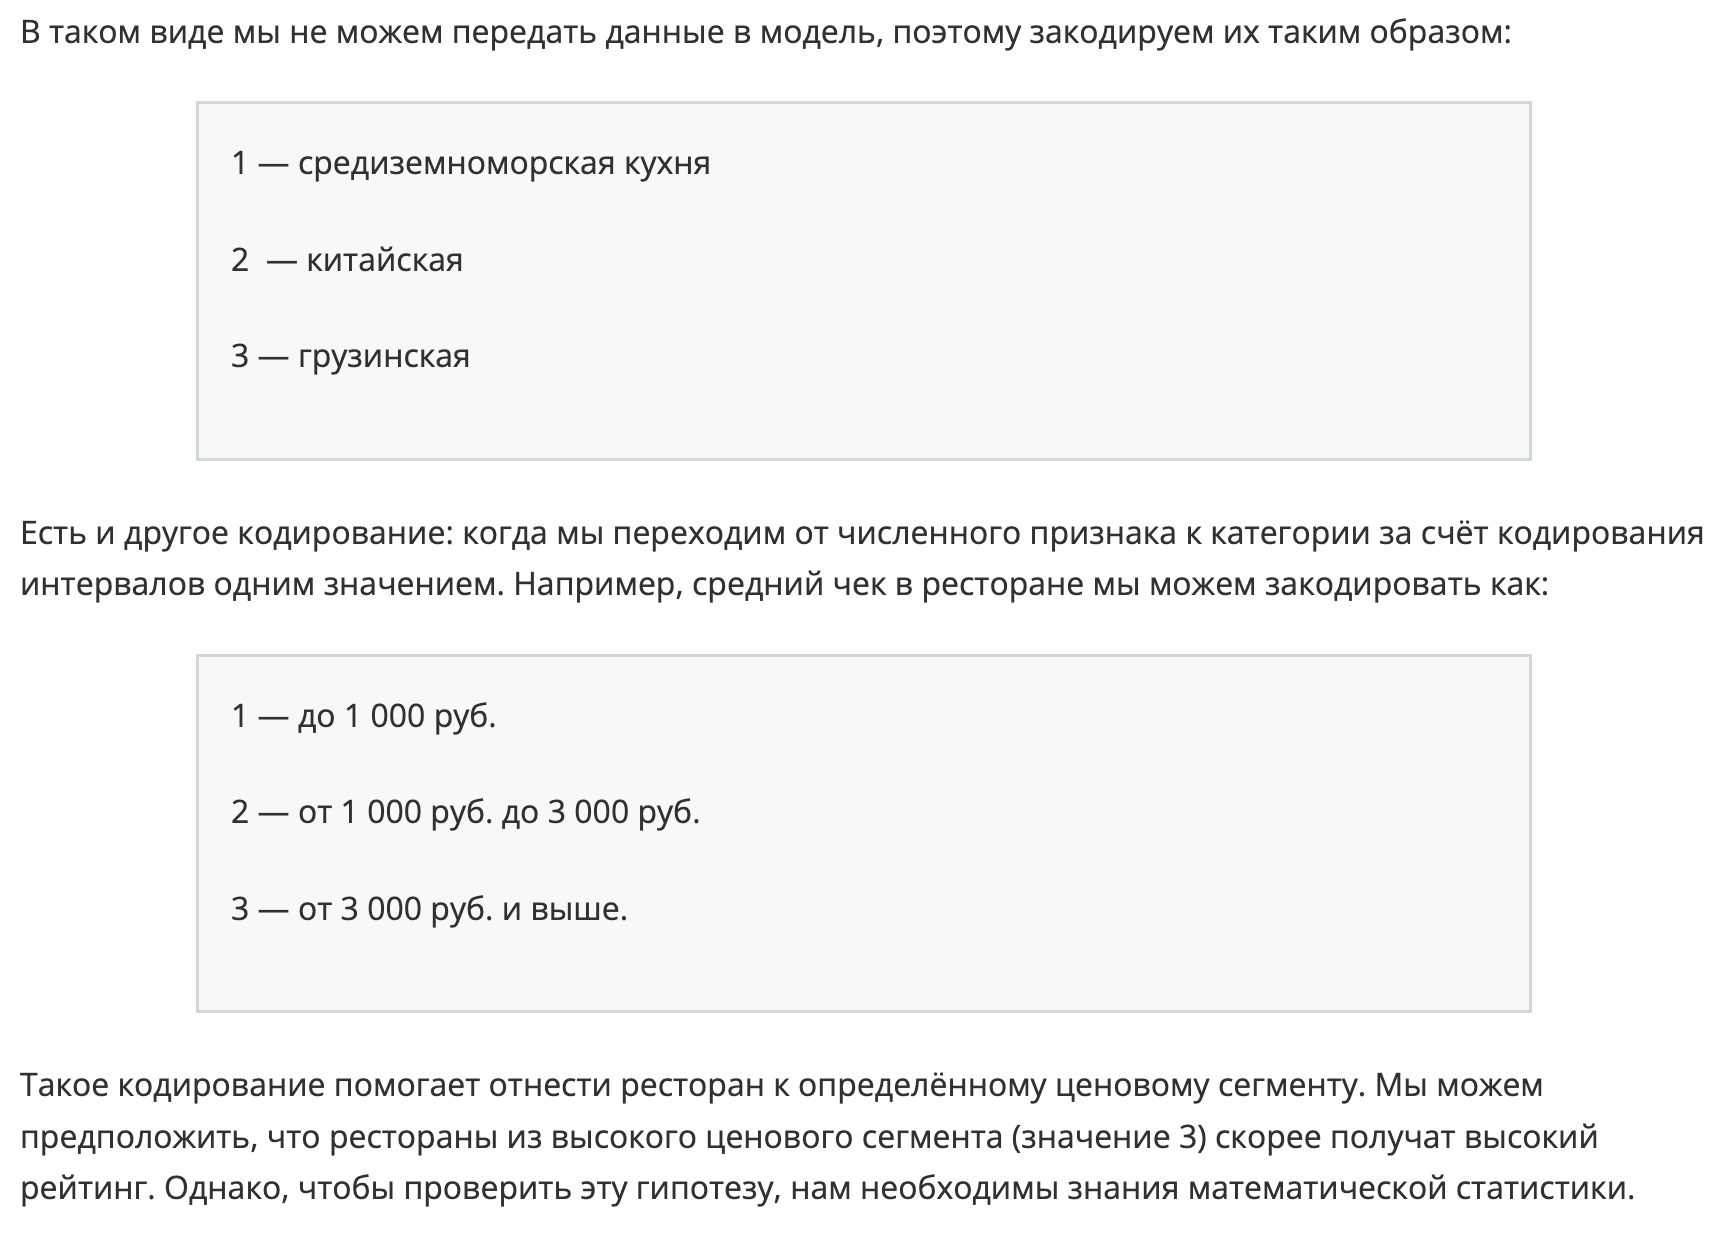

Проверка статистических гипотез — также один из важных методов разведывательного анализа данных.

# 4. Знакомство с данными: винные обзоры

>После просмотра документального фильма о сомелье вы захотели создать прогностическую модель для оценки вин вслепую, как это делает сомелье.

Определив бизнес-задачу, вы перешли к сбору данных для обучения модели. После нескольких недель парсинга сайта WineEnthusiast вам удалось собрать около 130 тысяч строк обзоров вин для анализа и обучения.

Вот какие признаки вам удалось собрать:

- country — страна-производитель вина.
- description — подробное описание.
- designation — название виноградника, где выращивают виноград для вина.
- points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.
- price — стоимость бутылки вина.
- province — провинция или штат.
- region_1 — винодельческий район в провинции или штате (например Напа).
- region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.
- taster_name — имя сомелье.
- taster_twitter_handle — твиттер сомелье.
- title — название вина, которое часто содержит год и другую подробную информацию.
- variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).
- winery — винодельня, которая производила вино.

In [3]:
# Прочитаем наш файл с винными обзорами:
data = pd.read_csv('data/wine.csv')

In [7]:
# Сколько всего дегустаторов приняло участие в винных обзорах?
data['taster_name'].value_counts().count()


19

In [8]:
data['taster_name'].nunique()

19

In [9]:
# Какова максимальная цена за бутылку в этом наборе данных? Введите целое число.
data['price'].max()

3300.0

#### Составьте чек-лист всех этапов жизненного цикла модели машинного обучения для создания ИИ-сомелье.

0. ПОСТАНОВКА ПРОБЛЕМЫ
- создать прогностическую модель для оценки вин вслепую.

1. СБОР ДАННЫХ
- нескольких недель парсинга сайта WineEnthusiast и нам удалось собрать около 130 тысяч строк обзоров вин для анализа и обучения, которые включают в себя 13 параметров.

2. ОЧИСТКА ДАННЫХ
- определим пропущенные значения, дубликаты, аномалии и выбросы в данных.

3. РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ
- МЕТОД FEATURE ENGINEERING (ПРОЕКТИРОВАНИЕ ПРИЗНАКОВ): создать новые, более сильные признаки для обучения модели (мы можем использовать внешние источники данных или конструировать признаки из имеющихся признаков в наборе данных)
- МЕТОД КОДИРОВАНИЯ ПРИЗНАКОВ: кодировании как правило категориальных признаков (работа с данными категориалными типа Category (например направления кухни закодировать цифрами), либо от численного признака к категорий (интервал счета в ресторанне например))
- Проверка статистических гипотез
- МЕТОД FEATURE SELECTION (ОТБОР ПРИЗНАКОВ): выбор признака больше всего влияющих на качество модели (проверить это помогают различные статистические тесты значимости)

4. ЭТАП МОДЕЛИРОВАНИЯ И ВЫВОДА МОДЕЛИ В ПРОДАКШЕН
- построение предсказательных моделей, проверка качества и публикация модели

In [19]:
# Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.
# Числовые признаки, как и количественные, отражают количество чего-либо. Например,
# доход в 20 000 руб. — это числовой признак.
# price,points

In [20]:
# Определим число уникальных категорий в каждом столбце нашей таблицы melb_df.
# Для этого создадим вспомогательную таблицу unique_counts
# Создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in data.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, data[col].nunique(),data[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,taster_twitter_handle,15,object
1,region_2,17,object
2,taster_name,19,object
3,points,21,int64
4,country,43,object
5,price,390,float64
6,province,425,object
7,variety,707,object
8,region_1,1229,object
9,winery,16757,object


In [ ]:
# Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся 
# записи есть, удалите их. В поле ниже введите, сколько дублирующихся записей вам удалось
# обнаружить.

